### Churn Probability Prediction

Import Libraries

In [1]:
import numpy as np
import pandas as pd

Data Preparation


Import Datasets

In [2]:
customers = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_customers_dataset.csv')
items = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_order_items_dataset.csv')
payments = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_order_payments_dataset.csv')
reviews = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_order_reviews_dataset.csv')
orders = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_orders_dataset.csv')
products = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/olist_products_dataset.csv')
prod_catg = pd.read_csv('C:/Users/user/Desktop/ekta/DBDA_CDAC/Project/product_category_name_translation.csv')

Merges Datasets

In [3]:
df = customers.merge(right = orders, how = 'left', on = 'customer_id')
df = df.merge(right = payments, on = 'order_id')
df = df.merge(right = items, on = 'order_id')
df = df.merge(right = products, on = 'product_id')
df = df.merge(right = reviews, on = 'order_id')
df = df.merge(right = prod_catg, on = 'product_category_name')

In [4]:
df.head(100)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,16-05-2020 15:05,16-05-2020 15:22,23-05-2020 10:47,...,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,26-05-2020 00:00,30-05-2020 22:34,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,09-11-2020 00:50,10-11-2020 00:47,22-11-2020 01:43,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLU��O, ESTOU PRECISANDO MUIT...",29-11-2020 00:00,01-12-2020 19:41,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,09-11-2020 00:50,10-11-2020 00:47,22-11-2020 01:43,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLU��O, ESTOU PRECISANDO MUIT...",29-11-2020 00:00,01-12-2020 19:41,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,07-05-2020 20:11,08-05-2020 22:22,19-05-2020 20:16,...,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compat�vel com seu valor, muito bonito...",27-05-2020 00:00,28-05-2020 02:43,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,03-02-2021 19:45,04-02-2021 22:29,19-02-2021 18:21,...,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,01-03-2021 00:00,02-03-2021 11:11,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,11020,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,27-03-2021 17:19,27-03-2021 17:30,10-04-2021 18:26,...,63.0,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,13-04-2021 00:00,15-04-2021 16:16,office_furniture
96,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,11020,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,27-03-2021 17:19,27-03-2021 17:30,10-04-2021 18:26,...,63.0,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,13-04-2021 00:00,15-04-2021 16:16,office_furniture
97,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,11020,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,27-03-2021 17:19,27-03-2021 17:30,10-04-2021 18:26,...,63.0,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,13-04-2021 00:00,15-04-2021 16:16,office_furniture
98,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,11020,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,27-03-2021 17:19,27-03-2021 17:30,10-04-2021 18:26,...,63.0,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,13-04-2021 00:00,15-04-2021 16:16,office_furniture


In [5]:
df = df.sort_values(by = 'order_item_id', ascending = False).drop_duplicates('order_id')

dropping unnecessary data

In [6]:
df.drop(['customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_status', 'seller_id', 'product_name_lenght', 
         'product_category_name', 'product_description_lenght', 'product_length_cm', 'product_height_cm', 'product_width_cm', 
         'product_photos_qty', 'review_creation_date', 'review_answer_timestamp', 'review_comment_message'
        ], axis = 1, inplace = True)

Feature Engineering

In [7]:
#Based on timestamps

#Turn date columns to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

#Make column that represent timestamp based on months and day of week
df['purchase_timestamp_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_timestamp_dow'] = df['order_purchase_timestamp'].dt.dayofweek

#Make column that represent timestamp based on hours
df['purchase_timestamp_hour'] = df['order_purchase_timestamp'].dt.hour

#classify hour column to part of day (morning, afternoon, evening, night)
def partofday(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
df['purchase_timestamp_pod'] = df['purchase_timestamp_hour'].apply(partofday)

In [8]:
#Based on Prices

#Total price value
df['total_price'] = df['order_item_id'] * df['price']

#Total freight value
df['total_freight_value'] = df['order_item_id'] * df['freight_value']

#Total order value (total price + total freight)
df['total_order_value'] = df['total_price'] + df['total_freight_value']

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96178 entries, 69483 to 115191
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96178 non-null  object        
 1   customer_unique_id             96178 non-null  object        
 2   order_id                       96178 non-null  object        
 3   order_purchase_timestamp       96178 non-null  datetime64[ns]
 4   order_approved_at              96165 non-null  object        
 5   order_delivered_carrier_date   95224 non-null  object        
 6   order_delivered_customer_date  94154 non-null  object        
 7   order_estimated_delivery_date  96178 non-null  object        
 8   payment_sequential             96178 non-null  int64         
 9   payment_type                   96178 non-null  object        
 10  payment_installments           96178 non-null  int64         
 11  payment_va

In [10]:
new_df = df.groupby('customer_unique_id').agg(
    total_order=pd.NamedAgg(column='order_id', aggfunc='count'),
    first_purchase_date=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='min'),
    last_purchase_date=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='max'),
    avg_item_ordered=pd.NamedAgg(column='order_item_id', aggfunc='mean'),
    avg_product_weight=pd.NamedAgg(column='product_weight_g', aggfunc='mean'),
    average_order_value=pd.NamedAgg(column='total_order_value', aggfunc='mean'),
    average_score=pd.NamedAgg(column='review_score', aggfunc='mean'),
    total_order_in_review=pd.NamedAgg(column='review_comment_title', aggfunc='count')
    ).reset_index()
new_df

,customer_unique_id,total_order,first_purchase_date,last_purchase_date,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2021-10-05 10:56:00,2021-10-05 10:56:00,1.0,1500.0,141.90,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2021-07-05 11:11:00,2021-07-05 11:11:00,1.0,375.0,27.19,4.0,0
2,0000f46a3911fa3c0805444483337064,1,2020-10-03 21:05:00,2020-10-03 21:05:00,1.0,1500.0,86.22,3.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,2020-12-10 20:29:00,2020-12-10 20:29:00,1.0,150.0,43.62,4.0,0
4,0004aac84e0df4da2b147fca70cf8255,1,2020-11-14 19:45:00,2020-11-14 19:45:00,1.0,6050.0,196.89,5.0,0
...,...,...,...,...,...,...,...,...,...
93078,fffcf5a5ff07b0908bd4e2dbc735a684,1,2020-08-06 21:00:00,2020-08-06 21:00:00,2.0,30000.0,1838.28,5.0,0
93079,fffea47cd6d3cc0a88bd621562a9d061,1,2020-10-12 20:07:00,2020-10-12 20:07:00,1.0,1720.0,84.58,4.0,0
93080,ffff371b4d645b6ecea244b27531430a,1,2020-07-02 15:49:00,2020-07-02 15:49:00,1.0,600.0,112.46,5.0,0
93081,ffff5962728ec6157033ef9805bacc48,1,2021-02-05 15:17:00,2021-02-05 15:17:00,1.0,444.0,133.69,5.0,1


In [11]:
#day differences between first and last purchase
new_df['delta_last_first'] = (new_df['last_purchase_date'] - new_df['first_purchase_date']).dt.days

#the average day each customer makes an order
new_df['avg_days_per_order'] = new_df['delta_last_first'] / new_df['total_order']

#customer order recency
new_df['recency_by_day'] = (new_df['last_purchase_date'].max() - new_df['last_purchase_date']).dt.days

#review-transaction ratio
new_df['rev_transaction_ratio'] = new_df['total_order_in_review'] / new_df['total_order']

In [12]:
new_df.head()

,customer_unique_id,total_order,first_purchase_date,last_purchase_date,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review,delta_last_first,avg_days_per_order,recency_by_day,rev_transaction_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2021-10-05 10:56:00,2021-10-05 10:56:00,1.0,1500.0,141.90,5.0,1,0,0.0,64,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2021-07-05 11:11:00,2021-07-05 11:11:00,1.0,375.0,27.19,4.0,0,0,0.0,156,0.0
2,0000f46a3911fa3c0805444483337064,1,2020-10-03 21:05:00,2020-10-03 21:05:00,1.0,1500.0,86.22,3.0,0,0,0.0,431,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,2020-12-10 20:29:00,2020-12-10 20:29:00,1.0,150.0,43.62,4.0,0,0,0.0,363,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,2020-11-14 19:45:00,2020-11-14 19:45:00,1.0,6050.0,196.89,5.0,0,0,0.0,389,0.0


In [13]:
#The most frequent day customers place orders
day_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_dow'].max(df['purchase_timestamp_dow'].count()).reset_index()
day_buy = pd.DataFrame(data = day_buy).rename(columns = {'purchase_timestamp_dow' : 'modus_dow_buy'})

#The most frequent month customers place orders
month_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_month'].max(df['purchase_timestamp_month'].count()).reset_index()
month_buy = pd.DataFrame(data = month_buy).rename(columns = {'purchase_timestamp_month' : 'modus_month_buy'})


In [14]:

#The most frequent time of day customers place orders
partofday_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_hour'].max(df['purchase_timestamp_hour'].count())
partofday_buy = pd.DataFrame(data = partofday_buy).reset_index()
def partofday(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
partofday_buy['purchase_timestamp_hour'] = partofday_buy['purchase_timestamp_hour'].apply(partofday)
partofday_buy.rename(columns = {'purchase_timestamp_hour' : 'modus_partofday_buy'}, inplace=True)

#customer payment method preferences
top_payment_type = df.groupby(['customer_unique_id'])['payment_type'].max(df['payment_type'].value_counts().argmax()).reset_index()
top_payment_type = pd.DataFrame(data = top_payment_type).rename(columns = {'payment_type':'preferred_payment_type'}).sort_values(by = 'preferred_payment_type', ascending = False)

#how much categories customer buy from
multi_prod_cat = df.groupby(['customer_unique_id'])['product_category_name_english'].nunique()
multi_prod_cat = pd.DataFrame(data = multi_prod_cat).rename(columns = {'product_category_name_english' : 'number_product_purchase_category'}).reset_index()

In [15]:
almostfinal_df = pd.merge(left = day_buy, right = month_buy, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = partofday_buy, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = top_payment_type, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = multi_prod_cat, how = 'left', on = 'customer_unique_id')

In [16]:
new_df = new_df.merge(right = almostfinal_df, how = 'left', on = 'customer_unique_id')

In [17]:
new_df.drop(['first_purchase_date', 'last_purchase_date'
        ], axis = 1, inplace = True)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93083 entries, 0 to 93082
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_unique_id                93083 non-null  object 
 1   total_order                       93083 non-null  int64  
 2   avg_item_ordered                  93083 non-null  float64
 3   avg_product_weight                93082 non-null  float64
 4   average_order_value               93083 non-null  float64
 5   average_score                     93083 non-null  float64
 6   total_order_in_review             93083 non-null  int64  
 7   delta_last_first                  93083 non-null  int64  
 8   avg_days_per_order                93083 non-null  float64
 9   recency_by_day                    93083 non-null  int64  
 10  rev_transaction_ratio             93083 non-null  float64
 11  modus_dow_buy                     93083 non-null  int64  
 12  modu

In [19]:
# turn categorical columns to numerical by encode it with one hot
oh_columns = ['modus_dow_buy','modus_month_buy', 'modus_partofday_buy', 'preferred_payment_type']
one_hot = pd.get_dummies(new_df[oh_columns], columns=oh_columns)
new_df = pd.concat([new_df, one_hot], axis=1)
new_df = new_df.drop(columns=['modus_dow_buy','modus_month_buy', 'modus_partofday_buy', 'preferred_payment_type', 'customer_unique_id'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93083 entries, 0 to 93082
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_order                         93083 non-null  int64  
 1   avg_item_ordered                    93083 non-null  float64
 2   avg_product_weight                  93082 non-null  float64
 3   average_order_value                 93083 non-null  float64
 4   average_score                       93083 non-null  float64
 5   total_order_in_review               93083 non-null  int64  
 6   delta_last_first                    93083 non-null  int64  
 7   avg_days_per_order                  93083 non-null  float64
 8   recency_by_day                      93083 non-null  int64  
 9   rev_transaction_ratio               93083 non-null  float64
 10  number_product_purchase_category    93083 non-null  int64  
 11  modus_dow_buy_0                     93083

In [20]:
# drop null value
new_df.dropna(inplace=True)

In [36]:
#make column to represent whether the customer churn or not
def return_churn(recent):
    if recent > 60:
        return 1
    else:
        return 0

new_df['is_churn'] = new_df['recency_by_day'].apply(lambda rec: return_churn(rec))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93082 entries, 0 to 93082
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_order                         93082 non-null  int64  
 1   avg_item_ordered                    93082 non-null  float64
 2   avg_product_weight                  93082 non-null  float64
 3   average_order_value                 93082 non-null  float64
 4   average_score                       93082 non-null  float64
 5   total_order_in_review               93082 non-null  int64  
 6   delta_last_first                    93082 non-null  int64  
 7   avg_days_per_order                  93082 non-null  float64
 8   recency_by_day                      93082 non-null  int64  
 9   rev_transaction_ratio               93082 non-null  float64
 10  number_product_purchase_category    93082 non-null  int64  
 11  modus_dow_buy_0                     93082

In [40]:
new_df

,total_order,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review,delta_last_first,avg_days_per_order,recency_by_day,rev_transaction_ratio,...,modus_month_buy_12,modus_partofday_buy_afternoon,modus_partofday_buy_evening,modus_partofday_buy_morning,modus_partofday_buy_night,preferred_payment_type_boleto,preferred_payment_type_credit_card,preferred_payment_type_debit_card,preferred_payment_type_voucher,is_churn
0,1,1.0,1500.0,141.90,5.0,1,0,0.0,64,1.0,...,0,0,0,1,0,0,1,0,0,1
1,1,1.0,375.0,27.19,4.0,0,0,0.0,156,0.0,...,0,0,0,1,0,0,1,0,0,1
2,1,1.0,1500.0,86.22,3.0,0,0,0.0,431,0.0,...,0,0,0,0,1,0,1,0,0,1
3,1,1.0,150.0,43.62,4.0,0,0,0.0,363,0.0,...,1,0,1,0,0,0,1,0,0,1
4,1,1.0,6050.0,196.89,5.0,0,0,0.0,389,0.0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93078,1,2.0,30000.0,1838.28,5.0,0,0,0.0,489,0.0,...,0,0,0,0,1,0,1,0,0,1
93079,1,1.0,1720.0,84.58,4.0,0,0,0.0,422,0.0,...,0,0,1,0,0,0,1,0,0,1
93080,1,1.0,600.0,112.46,5.0,0,0,0.0,524,0.0,...,0,1,0,0,0,0,1,0,0,1
93081,1,1.0,444.0,133.69,5.0,1,0,0.0,306,1.0,...,0,1,0,0,0,0,1,0,0,1


Scaling

In [22]:
# scale dataset to minimize bias
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_df)
scaled_new_df = scaler.transform(new_df)
scaled_new_df = pd.DataFrame(scaled_new_df, columns= new_df.columns)
scaled_new_df.sample(3)

,total_order,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review,delta_last_first,avg_days_per_order,recency_by_day,rev_transaction_ratio,...,modus_month_buy_12,modus_partofday_buy_afternoon,modus_partofday_buy_evening,modus_partofday_buy_morning,modus_partofday_buy_night,preferred_payment_type_boleto,preferred_payment_type_credit_card,preferred_payment_type_debit_card,preferred_payment_type_voucher,is_churn
68326,0.0,0.00,0.060606,0.021485,1.0,0.000000,0.0,0.0,0.238372,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
36987,0.0,0.00,0.003092,0.001889,1.0,0.333333,0.0,0.0,0.031977,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72385,0.0,0.15,0.296846,0.042533,0.0,0.000000,0.0,0.0,0.248062,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Modeling

Split Dataset

In [23]:
from sklearn.model_selection import train_test_split

#separate target from features
X = scaled_new_df.drop(columns=['is_churn','recency_by_day'])
y = scaled_new_df['is_churn']

#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
modelLRC = LogisticRegression()
modelLRC.fit(X_train, y_train)
score = modelLRC.score(X_test, y_test)
score

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9710653536257834

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [27]:
#confusion metrix 
y_pred = modelLRC.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[  221   795]
 [   13 26896]]


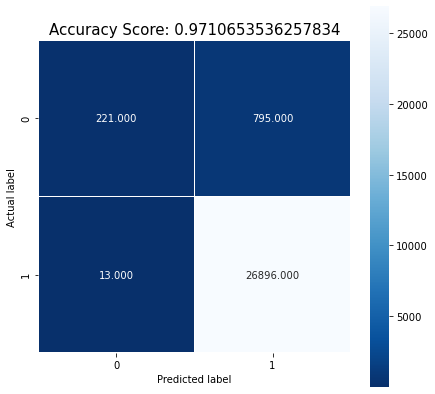

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("'Accuracy Score: {0}".format(score))
all_sample_title = ('Accuracy Score: {0}'.format(score))
plt.title(all_sample_title, size = 15);

Decision Tree Classifier

In [30]:
from sklearn import tree
modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)
modelDTC.score(X_test, y_test)

0.9549507609668756

Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train, y_train)
modelRFC.score(X_test, y_test)


0.9659444941808415

K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)

0.9658012533572068

Score Comparison.

In [33]:
#make table to compare model's scores
models = [modelLRC, modelDTC, modelRFC, modelKNN]
scores = {"Model":[],"Score":[]}

for m in models:
    scores["Model"].append(f'{m}'.split('(')[0])
    scores["Score"].append(m.score(X_test, y_test))
    
scoress = pd.DataFrame(scores).sort_values(by='Score', ascending=False)
scoress

,Model,Score
0,LogisticRegression,0.971065
2,RandomForestClassifier,0.965944
3,KNeighborsClassifier,0.965801
1,DecisionTreeClassifier,0.954951
